## Summary of reconstruction metric for different technologies 

In [27]:
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

#### Table for Average KS statistics and average deviance

In [80]:
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [146]:
truncated = True
experimental_name = {
                     0:'jurkat_293t_50_50',
                     8:'jurkat_293t_99_1',
                     9: 'Zheng_jurkat',
                     10:'Zheng_293t',
                     1:'pancreas_inDrop', 2:'pancreas_multi_celseq2_expression_matrix',
                     3:'pancreas_multi_fluidigmc1_expression_matrix', 4:'pancreas_multi_smartseq2_expression_matrix',
                     5:'pancreas_multi_celseq_expression_matrix',
                     }

gene_index = pd.Index(['25000'])

In [149]:
Average_deviance = dict()
for experimental_no in range(0,6):
    Frob = []
    KL = [] 
    KS_cell = []
    KS_gene = []
    for i in gene_index:
        infile = '../Result/benchmark/Dataset_{}_top{}_variance.json'.format(experimental_name[experimental_no],i)
        with open(infile) as f: 
            temp = json.load(f)
            Frob.append(temp['Frob'])
            KL.append(temp['KL'])
            KS_cell.append(temp['KS_cell'])
            KS_gene.append(temp['KS_gene'])
    Frob = pd.DataFrame(Frob,index=gene_index)
    KL = pd.DataFrame(KL,index=gene_index)
    KS_cell = pd.DataFrame(KS_cell,index=gene_index)
    KS_gene = pd.DataFrame(KS_gene,index=gene_index)
    if truncated:
        # Frobenius norm 
        # reshape dataframe into 
        all_df = (Frob.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']] + KL.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']])/2
    else:
        all_df = (Frob.iloc[:,4:8] + KL.iloc[:,4:8])/2
    Average_deviance[experimental_name[experimental_no]] = all_df.iloc[-1,:]
    
np.round(pd.DataFrame(Average_deviance),3)

,jurkat_293t_50_50,pancreas_inDrop,pancreas_multi_celseq2_expression_matrix,pancreas_multi_fluidigmc1_expression_matrix,pancreas_multi_smartseq2_expression_matrix,pancreas_multi_celseq_expression_matrix
PCA_10,0.363,0.399,0.317,0.385,0.340,0.206
NMF_10,0.427,0.436,0.380,0.453,0.430,0.315
NMFP_10,0.397,0.414,0.310,0.429,0.399,0.239
HPF_10,0.691,0.743,0.616,0.516,0.584,0.647


In [157]:
np.round(np.mean(pd.DataFrame(Average_deviance),axis=1),3)

PCA_10     0.335
NMF_10     0.407
NMFP_10    0.365
HPF_10     0.633
dtype: float64

In [150]:
Average_KS_Statistics = dict()
for experimental_no in range(0,6):
    Frob = []
    KL = [] 
    KS_cell = []
    KS_gene = []
    for i in gene_index:
        infile = '../Result/benchmark/Dataset_{}_top{}_variance.json'.format(experimental_name[experimental_no],i)
        with open(infile) as f: 
            temp = json.load(f)
            Frob.append(temp['Frob'])
            KL.append(temp['KL'])
            KS_cell.append(temp['KS_cell'])
            KS_gene.append(temp['KS_gene'])
    Frob = pd.DataFrame(Frob,index=gene_index)
    KL = pd.DataFrame(KL,index=gene_index)
    KS_cell = pd.DataFrame(KS_cell,index=gene_index)
    KS_gene = pd.DataFrame(KS_gene,index=gene_index)
    if truncated:
        # Frobenius norm 
        # reshape dataframe into 
        all_df = (KS_cell.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']] + KS_gene.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']])/2
    else:
        all_df = (KS_cell.iloc[:,4:8] + KS_gene.iloc[:,4:8])/2
    Average_KS_Statistics[experimental_name[experimental_no]] = all_df.iloc[-1,:]
    
np.round(pd.DataFrame(Average_KS_Statistics),3)

,jurkat_293t_50_50,pancreas_inDrop,pancreas_multi_celseq2_expression_matrix,pancreas_multi_fluidigmc1_expression_matrix,pancreas_multi_smartseq2_expression_matrix,pancreas_multi_celseq_expression_matrix
PCA_10,0.425,0.489,0.408,0.423,0.355,0.409
NMF_10,0.531,0.537,0.463,0.471,0.419,0.420
NMFP_10,0.495,0.532,0.461,0.448,0.440,0.409
HPF_10,0.028,0.088,0.124,0.383,0.332,0.084


In [158]:
np.round(np.mean(pd.DataFrame(Average_KS_Statistics),axis=1),3)

PCA_10     0.418
NMF_10     0.473
NMFP_10    0.464
HPF_10     0.173
dtype: float64

## Hyper-parameters

In [57]:
# Hyper-parameters 
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
# sb.set(style="white", palette="muted", color_codes=True)


In [58]:
a = np.linspace(0.1,2.1,num=11)
c = np.linspace(0.1,2.1,num=11)
gene_index = pd.MultiIndex.from_product([a, c],names=['a','c'])
df = pd.DataFrame(index=gene_index)

In [60]:
experimental_no = 5
experimental_name = {
                     0:'pancreas_inDrop', 1:'pancreas_multi_celseq2_expression_matrix',
                     2:'pancreas_multi_fluidigmc1_expression_matrix', 3:'pancreas_multi_smartseq2_expression_matrix',
                     4:'pancreas_multi_celseq_expression_matrix', 5:'jurkat_293t_50_50',
                     }
DatasetID = {
            0:6, 1:4, 2:7, 3:5, 4:8, 5:3
}




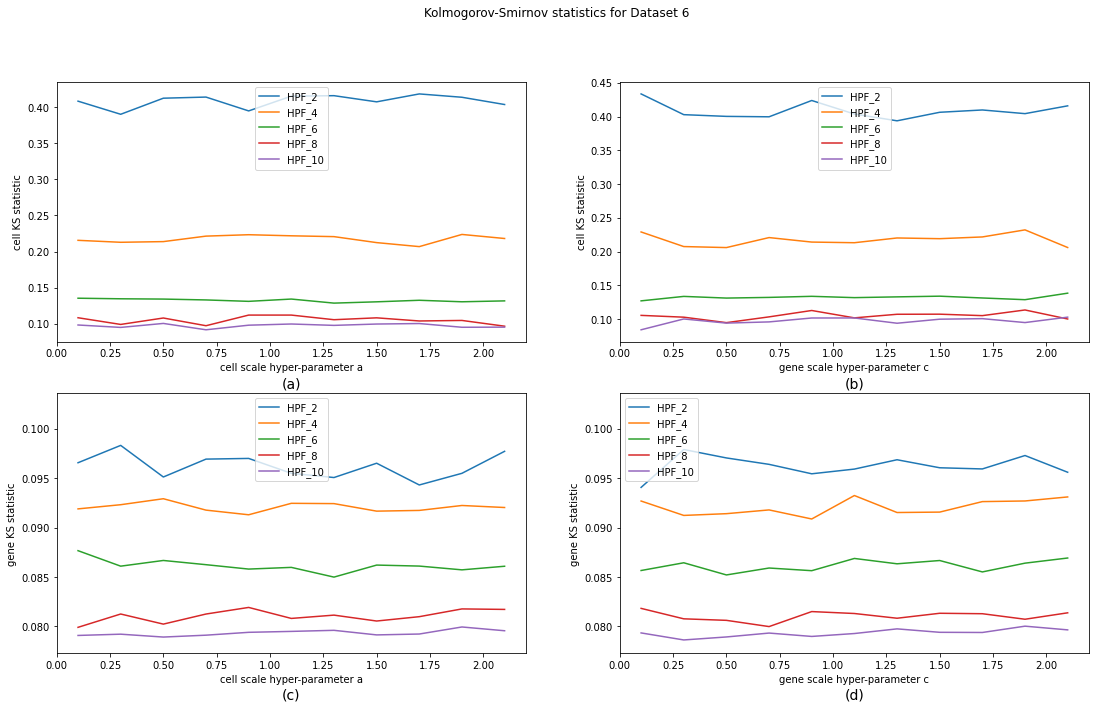

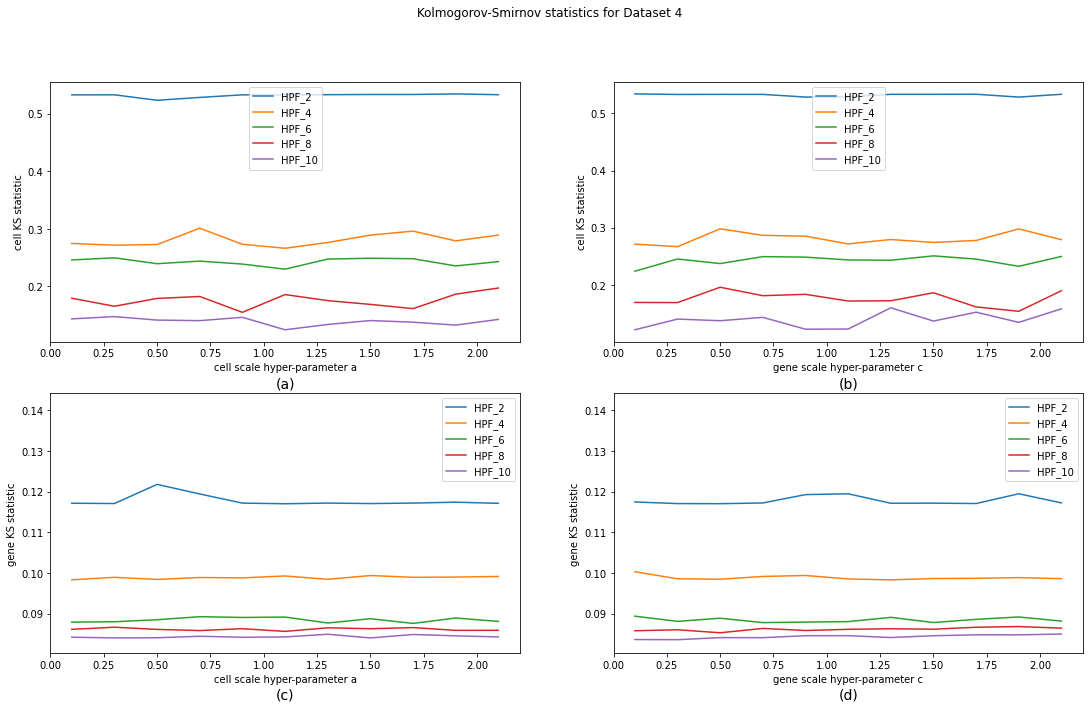

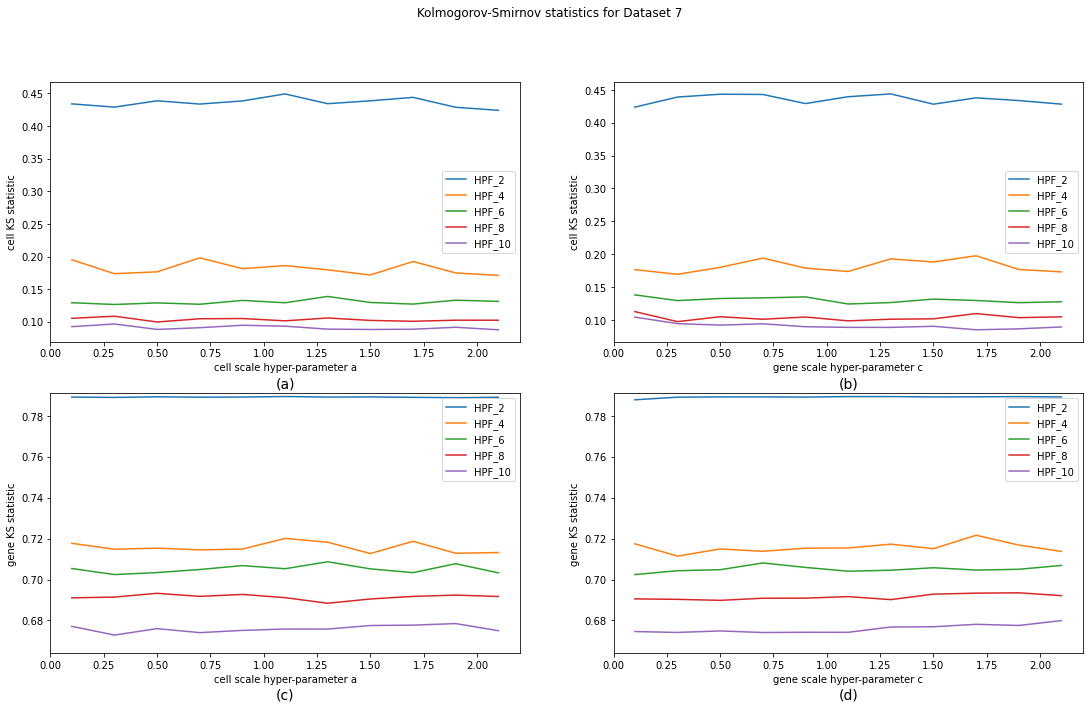

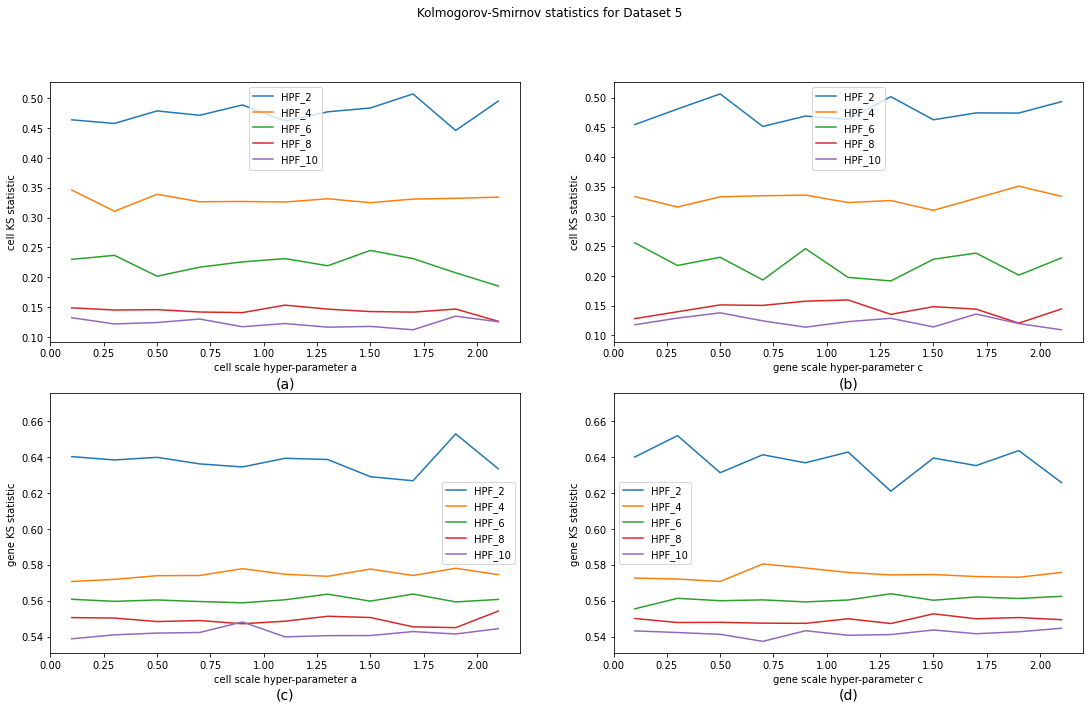

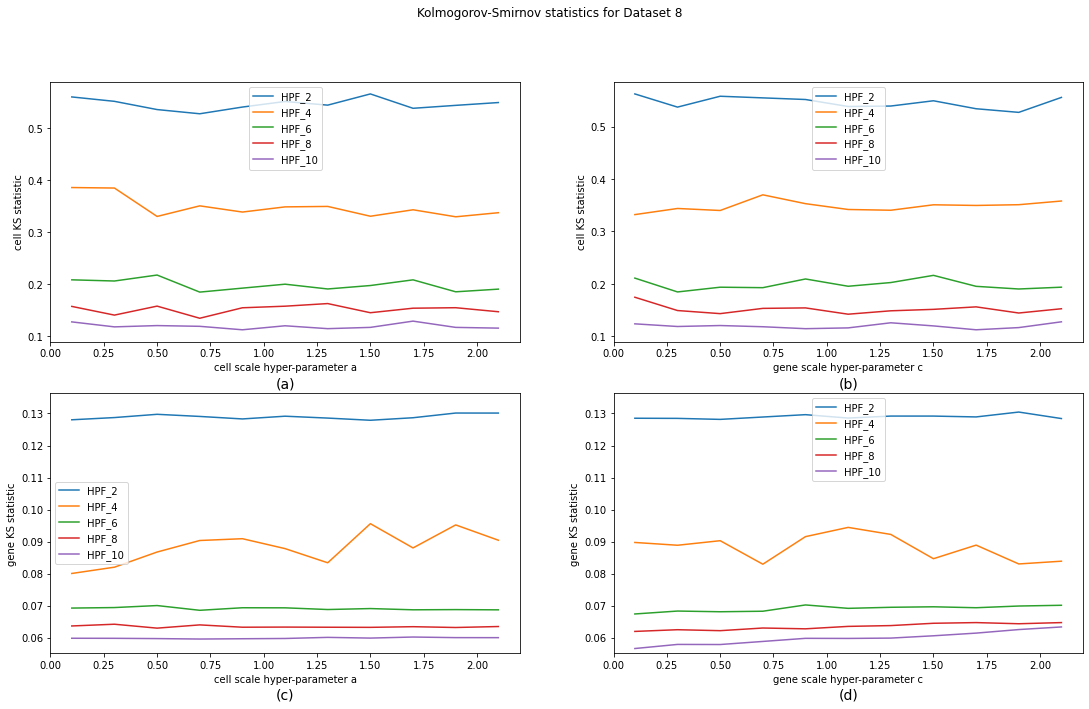

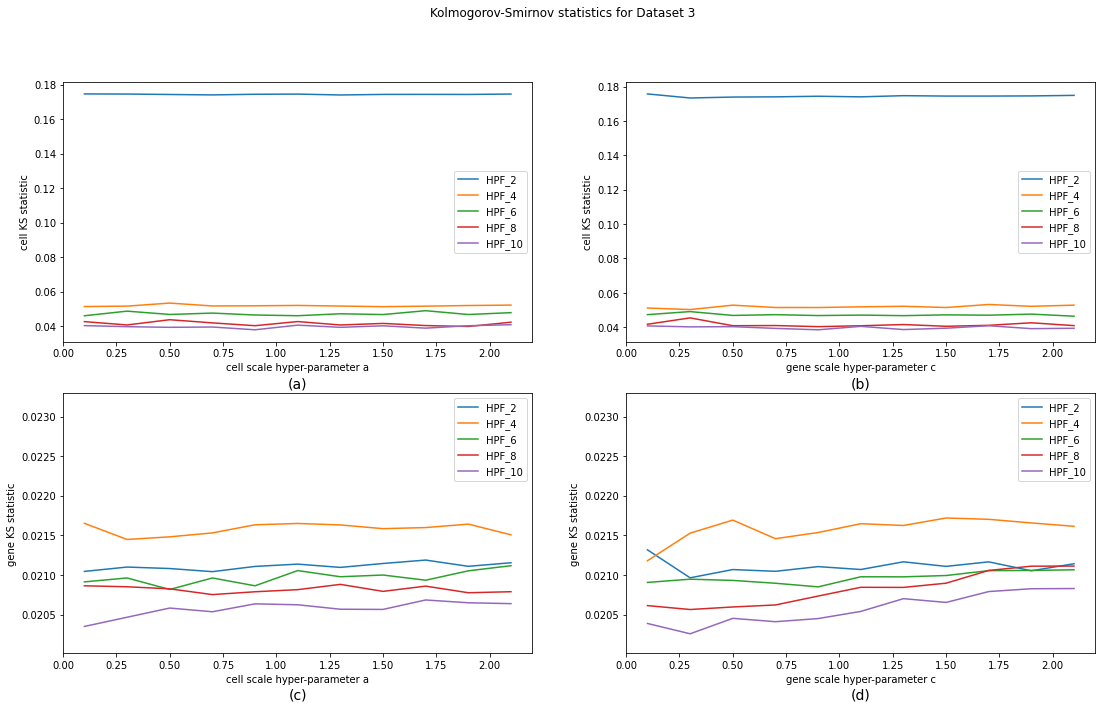

In [67]:
for experimental_no in range(0,6):
    Frob = []
    KL = [] 
    KS_cell = []
    KS_gene = []
    for i in gene_index:
        infile = '../Result/{}_hyper/Dataset_{}_hyper_{}_{}.json'.format(
            experimental_name[experimental_no],experimental_name[experimental_no],i[0],i[1])
        with open(infile) as f: 
            temp = json.load(f)
            Frob.append(temp['Frob'])
            KL.append(temp['KL'])
            KS_cell.append(temp['KS_cell'])
            KS_gene.append(temp['KS_gene'])
    Frob = pd.DataFrame(Frob,index=gene_index)
    KL = pd.DataFrame(KL,index=gene_index)
    KS_cell = pd.DataFrame(KS_cell,index=gene_index)
    KS_gene = pd.DataFrame(KS_gene,index=gene_index)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle('Kolmogorov-Smirnov statistics for Dataset {}'.format(DatasetID[experimental_no]))
    KS_cell.groupby('a').mean().plot(ax=ax1)
    ax1.set(xlabel='cell scale hyper-parameter a', ylabel='cell KS statistic')
    ax1.set_title("(a)", fontsize=14, y=-0.2, ha='center')
    KS_cell.groupby('c').mean().plot(ax=ax2)
    ax2.set(xlabel='gene scale hyper-parameter c', ylabel='cell KS statistic')
    ax2.set_title("(b)", fontsize=14, y=-0.2, ha='center')
    KS_gene.groupby('a').mean().plot(ax=ax3,ylim=[np.min(KS_gene.values),np.max(KS_gene.values)+0.001])
    ax3.set(xlabel='cell scale hyper-parameter a', ylabel='gene KS statistic')
    ax3.set_title("(c)", fontsize=14, y=-0.2, ha='center')
    KS_gene.groupby('c').mean().plot(ax=ax4,ylim=[np.min(KS_gene.values),np.max(KS_gene.values)+0.001])
    ax4.set(xlabel='gene scale hyper-parameter c', ylabel='gene KS statistic')
    ax4.set_title("(d)", fontsize=14, y=-0.2, ha='center')
    plt.savefig('../Result/Dataset_{}_hyper.pdf'.format(DatasetID[experimental_no]),format='pdf')

## Summary of reconstruction metrics for a specific dataset (10 latent factors) 

In [159]:
import matplotlib.pyplot as plt

In [160]:
experimental_no = 5
truncated = True
experimental_name = {
                     0:'pancreas_inDrop', 1:'pancreas_multi_celseq2_expression_matrix',
                     2:'pancreas_multi_fluidigmc1_expression_matrix', 3:'pancreas_multi_smartseq2_expression_matrix',
                     4:'pancreas_multi_celseq_expression_matrix', 5:'jurkat_293t_50_50',
                     }
DatasetID = {
            0:6, 1:4, 2:7, 3:5, 4:8, 5:3
}
gene_index = pd.Index([2500,5000,10000,15000,17500,25000])

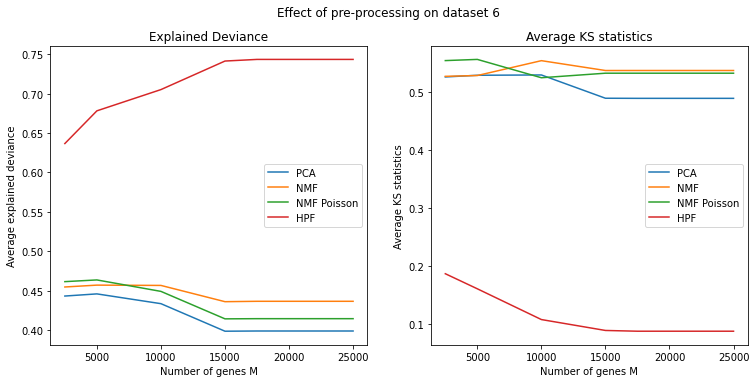

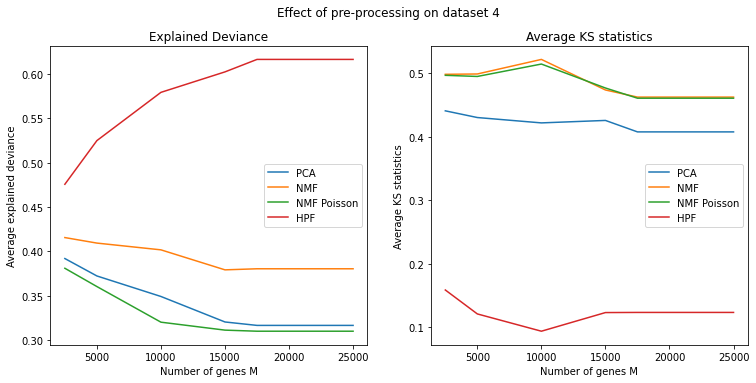

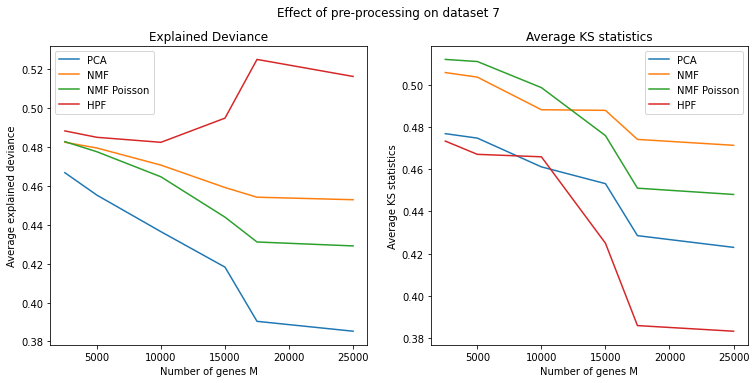

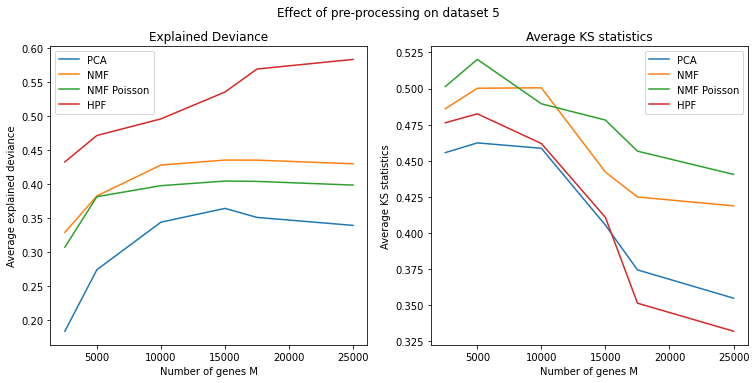

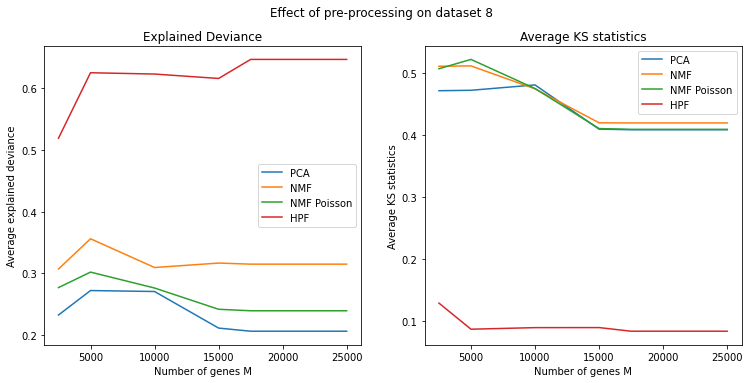

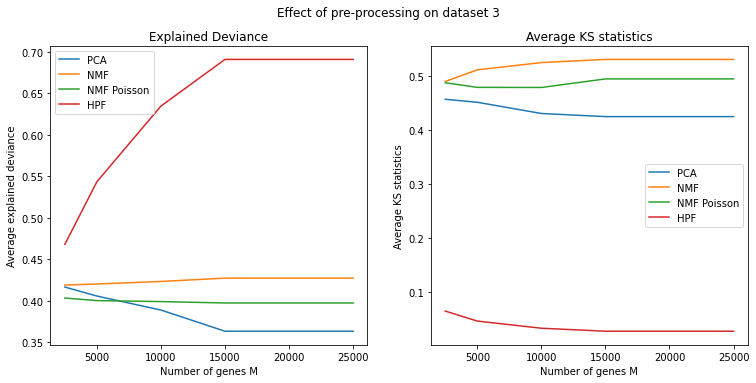

In [161]:
for experimental_no in range(0,6):

    fig, ((ax1, ax2)) = plt.subplots(1, 2)
    fig.set_size_inches(12.5, 5.5, forward=True)
    fig.suptitle('Effect of pre-processing on dataset {}'.format(DatasetID[experimental_no]))

    Frob = []
    KL = [] 
    KS_cell = []
    KS_gene = []
    for i in gene_index:
        infile = '../Result/benchmark/Dataset_{}_top{}_variance.json'.format(experimental_name[experimental_no],i)
        with open(infile) as f: 
            temp = json.load(f)
            Frob.append(temp['Frob'])
            KL.append(temp['KL'])
            KS_cell.append(temp['KS_cell'])
            KS_gene.append(temp['KS_gene'])
    Frob = pd.DataFrame(Frob,index=gene_index)
    KL = pd.DataFrame(KL,index=gene_index)
    KS_cell = pd.DataFrame(KS_cell,index=gene_index)
    KS_gene = pd.DataFrame(KS_gene,index=gene_index)
    if truncated:
        # Frobenius norm 
        # reshape dataframe into 
        frob_df = Frob.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']]
        kl_df = KL.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']]
        cell_df = (Frob.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']] + KL.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']])/2
        gene_df = (KS_cell.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']] + KS_gene.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']])/2
    else:
        gene_df = KS_gene.loc[:,['PCA_10','NMF_10','NMFP_10','HPF_10']]

    cell_df.plot(ax=ax1)
    ax1.set(xlabel='Number of genes M', ylabel='Average explained deviance',title='Explained Deviance')
    ax1.legend(['PCA','NMF','NMF Poisson','HPF'])
    gene_df.plot(ax=ax2)
    ax2.set(xlabel='Number of genes M', ylabel='Average KS statistics',title='Average KS statistics' )
    ax2.legend(['PCA','NMF','NMF Poisson','HPF'])

    plt.savefig('../Result/Dataset_{}_preprocessing_metrics.pdf'.format(DatasetID[experimental_no]),format='pdf')